In [1]:
# Import libraries and define variables
from GRANTA_MIScriptingToolkit import granta as mpy
import GRANTA_MIScriptingToolkit as gdl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import pandas as pd
#from wordcloud import WordCloud

In [2]:
session = gdl.GRANTA_MISession('http://azewacadmi1v1.win.ansys.com/mi_servicelayer/', autoLogon=True)
browseService = session.browseService
databases = browseService.GetDatabases().databases

print("Found {0} databases on the Granta MI Server".format(len(databases)))
for d in databases:
    print("Database key: {0.DBKey}, Database name: {0.name}".format(d))

Found 17 databases on the Granta MI Server
Database key: MI_ASM_Medical_Materials_1.54.3_2022_R1, Database name: ASM Medical Materials
Database key: MI_BiCrystalProject, Database name: BiCrystal Project
Database key: MU_Sandbox_Energy_systems, Database name: Sustainability
Database key: MI_JAHM_1.3.3m_2021_R2, Database name: JAHM Curve Data
Database key: Lvl3_BuildingEnvironment, Database name: Lvl 3 - Built Environment
Database key: MI_Restricted_Substances, Database name: Restricted Substances
Database key: MI_Asphalt, Database name: MI Asphalt Database
Database key: HighTemperatureSuperconductors_SynthesisCharacterization, Database name: HighTemperatureSuperconductors_SynthesisCharacterization
Database key: MI_RefPapers, Database name: Academic Resources Database
Database key: MI_Template_Additive_Manufacturing, Database name: Additive Manufacturing Template
Database key: MI_ProductDesign, Database name: MI Product Design Projects
Database key: EduPack, Database name: Main
Database 

In [3]:
df = pd.DataFrame({'DBKey': [db.DBKey for db in databases],
                  'DBName': [db.name for db in databases]})
df

,DBKey,DBName
0,MI_ASM_Medical_Materials_1.54.3_2022_R1,ASM Medical Materials
1,MI_BiCrystalProject,BiCrystal Project
2,MU_Sandbox_Energy_systems,Sustainability
3,MI_JAHM_1.3.3m_2021_R2,JAHM Curve Data
4,Lvl3_BuildingEnvironment,Lvl 3 - Built Environment
5,MI_Restricted_Substances,Restricted Substances
6,MI_Asphalt,MI Asphalt Database
7,HighTemperatureSuperconductors_SynthesisCharac...,HighTemperatureSuperconductors_SynthesisCharac...
8,MI_RefPapers,Academic Resources Database
9,MI_Template_Additive_Manufacturing,Additive Manufacturing Template


In [4]:
# Get Tables from Ref Papers DB
dbKey = "EduPack"
#dbKey = "MI_Training"
tables = browseService.GetTables(gdl.GetTables(DBKey=dbKey)).tableDetails

print("Found {0} tables in database {1}".format(len(tables), dbKey))
for t in tables:
    print("Table name: {0}".format(t.tableReference.name))

Found 27 tables in database EduPack
Table name: Coatings
Table name: Electricity mix
Table name: Elements
Table name: End of life
Table name: Legislations and Lists
Table name: Locations
Table name: Materials - in house
Table name: MaterialUniverse
Table name: Parts - Pre-defined
Table name: Power system - Energy storage
Table name: Power system - Low carbon
Table name: Power system - Nuclear
Table name: Processes - in house
Table name: ProcessUniverse
Table name: Producers
Table name: Products and parts
Table name: Reference
Table name: Resources
Table name: Restricted Substances
Table name: Shape
Table name: Specifications
Table name: Structural Sections
Table name: Suppliers
Table name: Transport
Table name: Typical materials
Table name: Use - mobile mode
Table name: Use - static mode


In [5]:
# Searching a database
table = 'MaterialUniverse'
attribute = "Young's modulus"

tableRef = gdl.PartialTableReference(tableName=table)
attrRef = gdl.AttributeReference(name=attribute, DBKey=dbKey, partialTableReference=tableRef)
searchCriterion = gdl.RecordSearchCriterion(searchAttribute=attrRef, existsSearchValue=gdl.ExistsSearchValue())
request = gdl.CriteriaSearch(DBKey=dbKey, searchCriteria=[searchCriterion])

searchResults = session.searchService.CriteriaSearch(request).searchResults

df2 = pd.DataFrame({'ShortName': [r.shortName for r in searchResults],
                     'LongName': [r.longName  for r in searchResults]})
df2


,ShortName,LongName
0,Cement (ordinary Portland),Cement (ordinary Portland)
1,Cement (Portland blast furnace),Cement (Portland blast furnace)
2,Concrete (conducting),Concrete (conducting)
3,Concrete (high alumina cement),Concrete (high alumina cement)
4,Soda barium glass,Soda barium glass
...,...,...
4198,15% glass fiber,PA66/6 (15% glass fiber)
4199,"10% carbon fiber, 25% glass fiber","PA66 (10% carbon fiber, 25% glass fiber)"
4200,"High heat, high impact","PLA (high heat, high impact)"
4201,"180°C max, N52UH",Neodymium magnet N52UH


In [6]:
# Export data from records
attributes = ["Young's modulus", "Density", "Price"]

attrRefs = [gdl.AttributeReference(name=a, DBKey=dbKey, partialTableReference=tableRef) for a in attributes]
recordRefs = [r.recordReference for r in searchResults]
request = gdl.GetRecordAttributesByRefRequest(recordReferences=recordRefs, attributeReferences=attrRefs)

recordData = session.dataExportService.GetRecordAttributesByRef(request).recordData

attrRefs = [gdl.AttributeReference(name=a, DBKey=dbKey, partialTableReference=tableRef) for a in attributes]
recordRefs = [r.recordReference for r in searchResults]
request = gdl.GetRecordAttributesByRefRequest(recordReferences=recordRefs, attributeReferences=attrRefs)

recordData = session.dataExportService.GetRecordAttributesByRef(request).recordData

s = [None]*len(df2)
s_high = [None]*len(df2)
s_low = [None]*len(df2)
for attribute in attributes:
    for idx, record in enumerate(recordData):
        attrValue = next((x for x in record.attributeValues if x.attributeName == attribute), None)
        s_high[idx] = attrValue.rangeDataType.high if attrValue else None
        s_low[idx] = attrValue.rangeDataType.low if attrValue else None
        s[idx] = round((s_high[idx]+s_low[idx])/2) if attrValue else None
    df2[attribute] = s
df2

,ShortName,LongName,Young's modulus,Density,Price
0,Cement (ordinary Portland),Cement (ordinary Portland),41,2.0,0.0
1,Cement (Portland blast furnace),Cement (Portland blast furnace),40,2.0,0.0
2,Concrete (conducting),Concrete (conducting),23,2.0,0.0
3,Concrete (high alumina cement),Concrete (high alumina cement),27,2.0,0.0
4,Soda barium glass,Soda barium glass,67,3.0,7.0
...,...,...,...,...,...
4198,15% glass fiber,PA66/6 (15% glass fiber),4,1.0,4.0
4199,"10% carbon fiber, 25% glass fiber","PA66 (10% carbon fiber, 25% glass fiber)",12,1.0,NaN
4200,"High heat, high impact","PLA (high heat, high impact)",3,1.0,NaN
4201,"180°C max, N52UH",Neodymium magnet N52UH,154,7.0,NaN


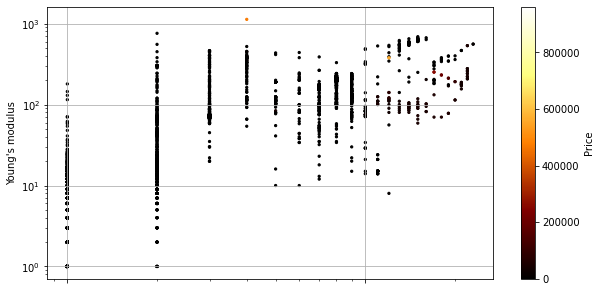

In [15]:
# Create a plot of the exported values
df2.plot.scatter(x="Density", y="Young's modulus", s=5, loglog=True, c="Price", colormap="afmhot", 
grid=True, figsize=(10, 5))

In [8]:
# Fixing random state for reproducibility
fig = plt.figure(c="Price", colormap="afmhot")
ax = fig.add_subplot(projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = df2["Young's modulus"]
    ys = df2["Density"]
    zs = df2["Price"]
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('Elastic modulus (GPa)')
ax.set_ylabel('Density (kg/m3)')
ax.set_zlabel('Price (€)')

plt.show()

AttributeError: 'Figure' object has no property 'c'

In [ ]:
print(s)

In [ ]:
stest=df2["Price"]

In [ ]:
print(stest)